In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sk_lm
import time

# Part 1: Comparing Stochastic gradient descent, gradient descent, and logistic regression against each other

## Dataset Generation: Generate a training random set (with m number of covariates and an m-sized weight vector) the compare the models can use to compare against each other.

In [4]:
FIGSIZE = (12,8)
def sigmoid(x): # sigmoid function math
    sig = 1 / (1 + np.exp(-x))
    return sig

def generate_data(m):
    # Initialize x and y
    x = np.zeros((m,10)) # x_i vector is 1 vector of 10 weight elements.
    y = np.zeros((m,1)) # y_i vector is only 1 element {0,1}.
    # Initialize weights
    weights = np.random.normal(loc= 0, scale= 1, size = 10)
    # Normalize the weights vector by dividing by the norm of the weights.
    weights = weights / np.linalg.norm(weights)

    for i in range(m):
        x[i] = np.random.normal(loc= 0, scale= 1, size = 10)
        dot_prod = weights.dot(x[i]) # get the dot product of the weights and x_i vectors and then
        sigmoid_fn = sigmoid(dot_prod) # put output through sigmoid function
        prob = [1-sigmoid_fn, sigmoid_fn] # list of probabilities for a 0 and 1.
        y[i] = np.random.choice([0, 1], p = prob) # select a random value of 0 or 1 with sigmoid probability (or inverse sigmoid probability).
    # returns the true w as well as X, Y data
    return weights, x, y

## Algorithm 1: logistic regression `sklearn.linear_model` function

The goal is to learn $w$.  Algorithm 1 is logistic
  regression.

In [5]:
def logistic_weight_pred(x, y):
    clf = sk_lm.LogisticRegression(max_iter = 1000).fit(x, y.ravel()) # Fit the model according to the given training data.
    return clf.coef_ # coef_ndarray of shape (1, n_features) or (n_classes, n_features)
    # Coefficient of the features in the decision function this is based on the estimate from logistic model.

## Algorithm 2: gradient descent with square loss

Algorithm 2 is gradient descent with respect to square loss.

Getting the derivative of the square loss function results in the following function after applying the chain rule:
$$\frac{\delta}{\delta t} L_i(w^{(t)}) = [(\sigma (wx_i) - y_i)] \sigma (wx_i) (1-\sigma (wx_i))x_i$$

In [6]:
def delta_loss_fn(x_i, y_i, weights):
    """
    calculate delta loss function for each x_i and y_iw
    """
    dot_prod = weights.dot(x_i)
    y_prob = sigmoid(dot_prod)
    delta_loss = (y_prob - y_i) * y_prob * (1 - y_prob) * x_i # Use chain rule delta loss equation derived above.
    return delta_loss

def gradient_desc(x, y, iter = 1000, step_size = 0.01):
    """
     Algorithm 2 is gradient descent where you train a model of the form σ(w0·x) (with parameter w0)
     with respect to square loss, i.e. the loss function is 1/2(σ(w0·x) − y)^2,
     averaged over the points in the training set
     (code this up yourself, including calculating the gradient).
    """
    weights = np.zeros(x.shape[1]) # initialize weights vector as a zeros vector on the length of the first x vector
    for i in range(iter): # iterate 1000 times
        delta_loss_list = [] # initialize a list of delta losses for each point that is iterated on in this algo.
        for m in range(x.shape[0]): # iterate through all m training points
            delta_loss = delta_loss_fn(x[m], y[m], weights)
            delta_loss_list.append(delta_loss)
        gradient_mean = np.mean(delta_loss_list, axis= 0) # get mean of delta_loss_list
        weights = weights - step_size * gradient_mean # multiply step_size with gradient_mean and update weights
    return weights

## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [7]:
def stochastic_desc(x, y, iter = 1000, step_size = 0.01):
    """
    Algorithm 3 is stochastic gradient descent again with respect to square loss,
    where during each iteration we use the gradient at one random point from the training set.
    """
    weights = np.zeros(x.shape[1]) # initialize weights vector as a zeros vector on the length of the first x vector
    for i in range(iter):
        random_selection = np.random.randint(0, x.shape[0]) # randomly select a datapoint in the training set
        delta_loss = delta_loss_fn(x[random_selection], y[random_selection], weights)
        weights = weights - step_size * delta_loss # multiply step_size and update weights
    return weights

I measured error for each method at different sample size. Finally, I have plotted the results for each algorithm as I make $m$ large (use $m=50, 100, 150, 200, 250$). Also I record the time taken to run each experiment.

In [8]:
# Test logistic algo first
m = [50, 100, 150, 200, 250] # training set sizes to test

start = time.time()
error_in_logistic_trial_size = [] # initialize error for different sample sizes
for t_size in m:
    repeated_error_for_trial_size = [] # initialize error for different sample sizes
    for repeat in range(10):
        weights, x , y = generate_data(t_size)
        weights_pred = logistic_weight_pred(x, y)
        diff = np.linalg.norm(weights - weights_pred)
        repeated_error_for_trial_size.append(diff)
    error_in_logistic_trial_size.append(np.mean(repeated_error_for_trial_size)) # get mean error of 10 tests.
end = time.time()
experiment_time = end - start
print("Time taken to run logistic evaluation test is", experiment_time, " seconds.")


Time taken to run logistic evaluation test is 0.250291109085083  seconds.


In [9]:
# Test gradient descent algo second
m = [50, 100, 150, 200, 250] # training set sizes to test

start = time.time()
error_in_gradient_descent_trial_size = [] # initialize error for different sample sizes
for t_size in m:
    repeated_error_for_trial_size = [] # initialize error for different sample sizes
    for repeat in range(10):
        weights, x , y = generate_data(t_size)
        weights_pred = gradient_desc(x, y)
        diff = np.linalg.norm(weights - weights_pred)
        repeated_error_for_trial_size.append(diff)
    error_in_gradient_descent_trial_size.append(np.mean(repeated_error_for_trial_size)) # get mean error of 10 tests.
end = time.time()
experiment_time = end - start
print("Time taken to run gradient descent evaluation test is", experiment_time, " seconds.")


Time taken to run gradient descent evaluation test is 64.48376679420471  seconds.


In [10]:
# Test stochastic gradient descent algo last
m = [50, 100, 150, 200, 250] # training set sizes to test

start = time.time()
error_in_stochastic_gradient_trial_size = [] # initialize error for different sample sizes
for t_size in m:
    repeated_error_for_trial_size = [] # initialize error for different sample sizes
    for repeat in range(10):
        weights, x , y = generate_data(t_size)
        weights_pred = stochastic_desc(x, y)
        diff = np.linalg.norm(weights - weights_pred)
        repeated_error_for_trial_size.append(diff)
    error_in_stochastic_gradient_trial_size.append(np.mean(repeated_error_for_trial_size)) # get mean error of 10 tests.
end = time.time()
experiment_time = end - start
print("Time taken to run stochastic gradient descent evaluation test is", experiment_time, " seconds.")


Time taken to run stochastic gradient descent evaluation test is 0.7977478504180908  seconds.


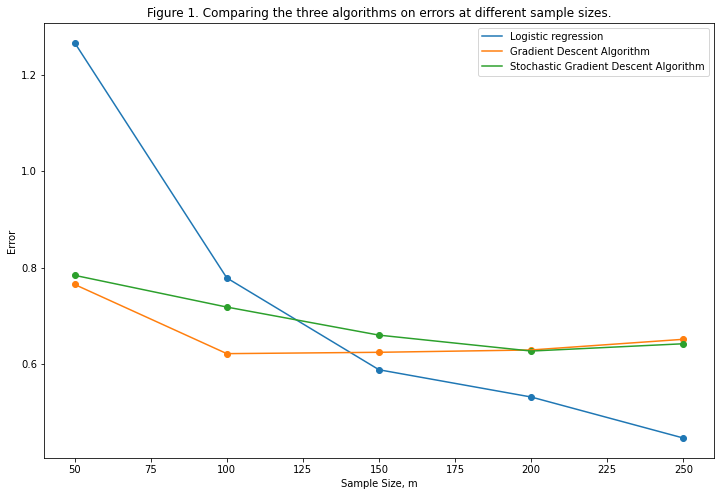

In [11]:
plt.figure(figsize = FIGSIZE)
plt.scatter(m, error_in_logistic_trial_size)
plt.scatter(m, error_in_gradient_descent_trial_size)
plt.scatter(m, error_in_stochastic_gradient_trial_size)
plt.plot(m, error_in_logistic_trial_size, label = "Logistic regression")
plt.plot(m, error_in_gradient_descent_trial_size, label = "Gradient Descent Algorithm")
plt.plot(m, error_in_stochastic_gradient_trial_size, label = "Stochastic Gradient Descent Algorithm")

plt.title("Figure 1. Comparing the three algorithms on errors at different sample sizes.")
plt.xlabel("Sample Size, m")
plt.ylabel("Error")
plt.legend()
plt.show()

# Part 2: AdaBoost Classifier on Breast Cancer Data

In [12]:
from sklearn import datasets, tree, ensemble
from sklearn.model_selection import cross_val_score

In [13]:
cancer = datasets.load_breast_cancer()

For each depth in $1, \dots, 5$, I instantiated an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then I recorded the 10-fold cross-validated error on the entire breast cancer data set. I plotted the resulting curve of accuracy against base classifier depth.

In [14]:
depth_accuracy = []

for depth in range(5):
    dt_clf = tree.DecisionTreeClassifier(max_depth= depth+1, random_state = 101) # set random_state = 101
    ada_clf = ensemble.AdaBoostClassifier(base_estimator= dt_clf, n_estimators= 10, learning_rate= 1, random_state= 101) # wrap adaboost on the decision tree classifier to see how accuracy is improved (or not). set random_state = 101
    cv_acc = cross_val_score(ada_clf, cancer.data, cancer.target, cv= 10)
    depth_accuracy.append(np.mean(cv_acc))

Text(0, 0.5, 'Accuracy')

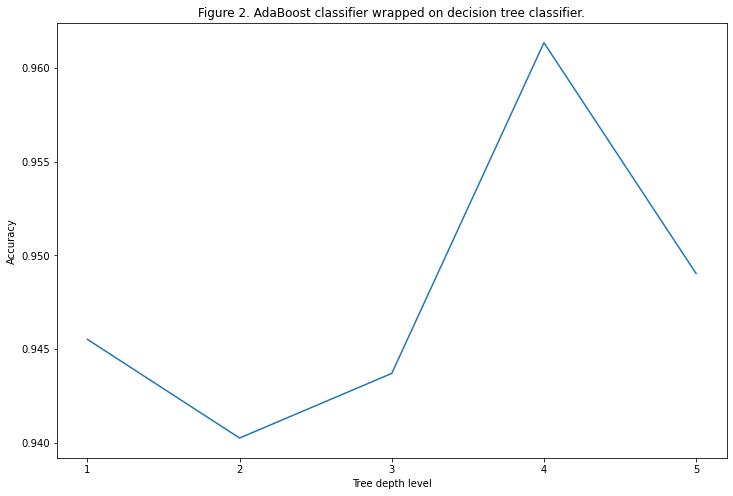

In [15]:
plt.figure(figsize = FIGSIZE)
plt.plot(range(1, 6), depth_accuracy)

plt.xticks(range(1,6))
plt.title("Figure 2. AdaBoost classifier wrapped on decision tree classifier.")
plt.xlabel("Tree depth level")
plt.ylabel("Accuracy")